In [27]:
import numpy as np
import pandas as pd
import matplotlib as plt

### Problema 1
¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [28]:
#creando arreglo de booleanos, todos verdaderos
arr=np.ones((1,1000),dtype=bool)
print(f"El tamaño en bytes del arreglo booleano de 1000 elementos es: {arr.nbytes}")

El tamaño en bytes del arreglo booleano de 1000 elementos es: 1000


### Problema 2
Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [29]:
#arreglo de orden decreciente y mostrando los ultimos 10 que se generan en orden descendiente
par=np.arange(2,100,2)
par=np.sort(par)[::-1]
par[-10:]


array([20, 18, 16, 14, 12, 10,  8,  6,  4,  2])

### Problema 3
Dado el array

| 2 | 4 | 5 | 6 |
| --| --| --| --|
| 0 | 3 | 7 | 4 |
| 8 | 8 | 5 | 2 |
| 1 | 5 | 6 | 1 |

Seleccione con una instrucción el subarray de elementos

| 0 | 3 | 7 | 4 |
| --| --| --| --|

Después, seleccione el subarray de elementos

| 2 | 5 |
| --| --|
| 8 | 5 |


In [30]:
#Creando arreglo de ejercicio
ej=np.array([[2,4,5,6],[0,3,7,4],[8,8,5,2],[1,5,6,1]])
print(f"la matriz es: \n {ej}")
print(f"primer subarray es: \n {ej[1]}")
#subarreglo creado con la consulra de cada valor en el arreglo con las columnas especificadas
print(f"segundo subarray es: \n {np.array([[ej[0][0],ej[0][2]],[ej[2][0],ej[2][2]]])}")


la matriz es: 
 [[2 4 5 6]
 [0 3 7 4]
 [8 8 5 2]
 [1 5 6 1]]
primer subarray es: 
 [0 3 7 4]
segundo subarray es: 
 [[2 5]
 [8 5]]


### Problema 4
Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [31]:
#creacion de arreglos, su resta y media del resultado
a=np.array([1,4,2,7])
b=np.array([1,3,2,9])
print(f"La media aritmetica de la diferencia es: {np.mean(a-b)}")


La media aritmetica de la diferencia es: -0.25


### Problema 5
Tengo valores de cordenadas (x, y) en las columnas del array
| 1.33 | 4.5 |
| --| --|
| 30.0 | 10.7 |
| 70.2 | 0.5 |

Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array.

In [32]:
#coordenadas x,y
coor=np.array([[1.33,4.5],[30.0,10.7],[70.2,0.5]])
coor=np.append(coor,np.array([[37.1,-3.6]]),axis=0)
print(f"Forma de la matriz:{coor.shape} Numero de dimensiones:{coor.ndim}")
coor


Forma de la matriz:(4, 2) Numero de dimensiones:2


array([[ 1.33,  4.5 ],
       [30.  , 10.7 ],
       [70.2 ,  0.5 ],
       [37.1 , -3.6 ]])

### Problema 6
Copie el array del ejercicio anterior. Traspóngalo. Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [33]:
coor=np.transpose(coor)
#reviso que este transpuesta
coor

array([[ 1.33, 30.  , 70.2 , 37.1 ],
       [ 4.5 , 10.7 ,  0.5 , -3.6 ]])

In [34]:
#se agrega coordenadas teniendo en cuenta una dimension 
np.append(coor, np.array([[10.8,35.8],[3.0,12.0]]), axis=1)

array([[ 1.33, 30.  , 70.2 , 37.1 , 10.8 , 35.8 ],
       [ 4.5 , 10.7 ,  0.5 , -3.6 ,  3.  , 12.  ]])

## Parte 2: Exploracion y mineria de datos

### Problema 1
¿Cuántos Municipios tienen más de 100000 habitantes?.


In [35]:
# se lee el archivo de poblacion
df=pd.read_csv('NucleosPoblacion.csv')
df.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


In [36]:
#creo filtro de dataframe donde poblacion supera los 100,000 habitantes
filtrado=df[df.Poblacion > 100000]
#conteo de valores unicos de columna de municipio (nombres distintos)
print(f"El numero de distintos municipios con poblacion mayor a los 100,000 habitantes es: {len(pd.unique(filtrado['Municipio']))}")

El numero de distintos municipios con poblacion mayor a los 100,000 habitantes es: 62


### Problema 2
Realice una gráfica de barras sobre la polbación de cada ciudad, ordenela de menor a mayo y responda:
<ol type="a">
  <li> ¿Cuál es la segunda ciudad más poblada?</li>
  <li> ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?</li>
</ol>

<AxesSubplot:xlabel='Municipio'>

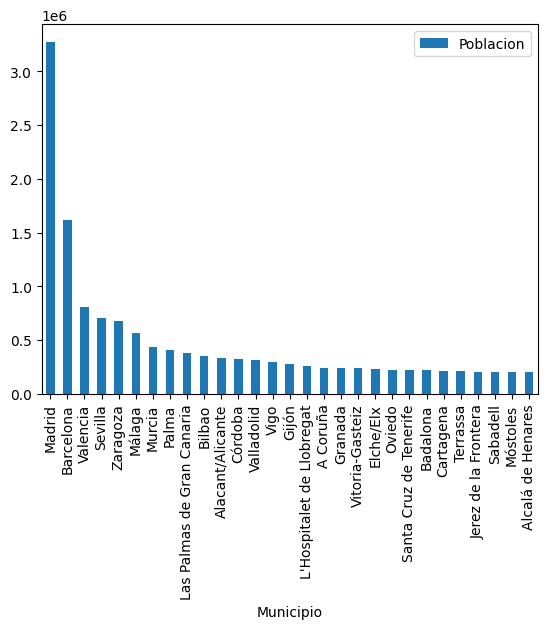

In [37]:
#aumento filtrado
filtrado=df[df.Poblacion > 200000]
#crear grafico de barras
filtrado.sort_values(by='Poblacion', ascending=False).plot.bar(x='Municipio', y='Poblacion', rot=90)

##### R// La ciudad mas poblada es Madrid

In [38]:
filtrado=filtrado.sort_values(by='Poblacion', ascending=False)
filtrado['TotalPoblacion_rank'] = filtrado['Poblacion'].rank(ascending=False)
#listado de los indices que quiero que me devuelva
filtrado[['Municipio','Poblacion','TotalPoblacion_rank']]

,Municipio,Poblacion,TotalPoblacion_rank
355,Madrid,3273049.0,1.0
623,Barcelona,1619337.0,2.0
561,Valencia,809267.0,3.0
492,Sevilla,704198.0,4.0
591,Zaragoza,675121.0,5.0
391,Málaga,568507.0,6.0
420,Murcia,441345.0,7.0
610,Palma,404681.0,8.0
9,Las Palmas de Gran Canaria,383308.0,9.0
571,Bilbao,353187.0,10.0


##### R// Granada ocupa el puesto 18 de ciudades mas pobladas

### Problema 3
¿Cuántos municipios de Málaga tienen más de 50,000 habitantes?.

In [39]:

filtrado=df[(df['Poblacion']>50000) & (df['Provincia'] =='Málaga')]
print(f"Los municipios con mas de 50,000 habitantes en Málaga son: {len(filtrado['Municipio'].unique())}")



Los municipios con mas de 50,000 habitantes en Málaga son: 8


### Problema 4
¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [40]:
#municipio mas al norte
NorteMax=df[df['Y']==df['Y'].max()]
NorteMax=NorteMax[['Y','Municipio','Poblacion','Provincia']]
print("El municipio mas al norte es:")
NorteMax

El municipio mas al norte es:


,Y,Municipio,Poblacion,Provincia
104,43.625578,Viveiro,16211.0,Lugo


### Problema 5
Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.


In [41]:
#Obtener media, mediana, desviacion estandar, maximo y minimo de municipios de provincia de granada
gran=df[df['Provincia']=='Granada']
gran=gran[['Municipio','Poblacion','Provincia']]
media=gran['Poblacion'].mean()
mediana=gran['Poblacion'].median()
std=gran['Poblacion'].std()
max=gran[gran.Poblacion==gran['Poblacion'].max()]
min=gran[gran.Poblacion==gran['Poblacion'].min()]
print(f"Media: {media}\n\nMediana: {mediana} \n\nMunicipio con mayor poblacion: \n{max}, \n\nMunicipio con menor poblacion: \n{min.to_markdown}")

Media: 30217.85

Mediana: 17526.0 

Municipio con mayor poblacion: 
    Municipio  Poblacion Provincia
272   Granada   239154.0   Granada, 

Municipio con menor poblacion: 
<bound method DataFrame.to_markdown of     Municipio  Poblacion Provincia
275    Illora    10386.0   Granada>


### Problema 6
Realice un histograma con la población de los Municipios para cada una de las provincias.

array([[<AxesSubplot:title={'center':'A Coruña'}>,
        <AxesSubplot:title={'center':'Alacant/Alicante'}>,
        <AxesSubplot:title={'center':'Albacete'}>,
        <AxesSubplot:title={'center':'Almería'}>,
        <AxesSubplot:title={'center':'Asturias'}>,
        <AxesSubplot:title={'center':'Badajoz'}>,
        <AxesSubplot:title={'center':'Barcelona'}>],
       [<AxesSubplot:title={'center':'Burgos'}>,
        <AxesSubplot:title={'center':'Cantabria'}>,
        <AxesSubplot:title={'center':'Castelló/Castellón'}>,
        <AxesSubplot:title={'center':'Ceuta'}>,
        <AxesSubplot:title={'center':'Ciudad Real'}>,
        <AxesSubplot:title={'center':'Cuenca'}>,
        <AxesSubplot:title={'center':'Cáceres'}>],
       [<AxesSubplot:title={'center':'Cádiz'}>,
        <AxesSubplot:title={'center':'Córdoba'}>,
        <AxesSubplot:title={'center':'Girona'}>,
        <AxesSubplot:title={'center':'Granada'}>,
        <AxesSubplot:title={'center':'Guadalajara'}>,
        <AxesSubplot

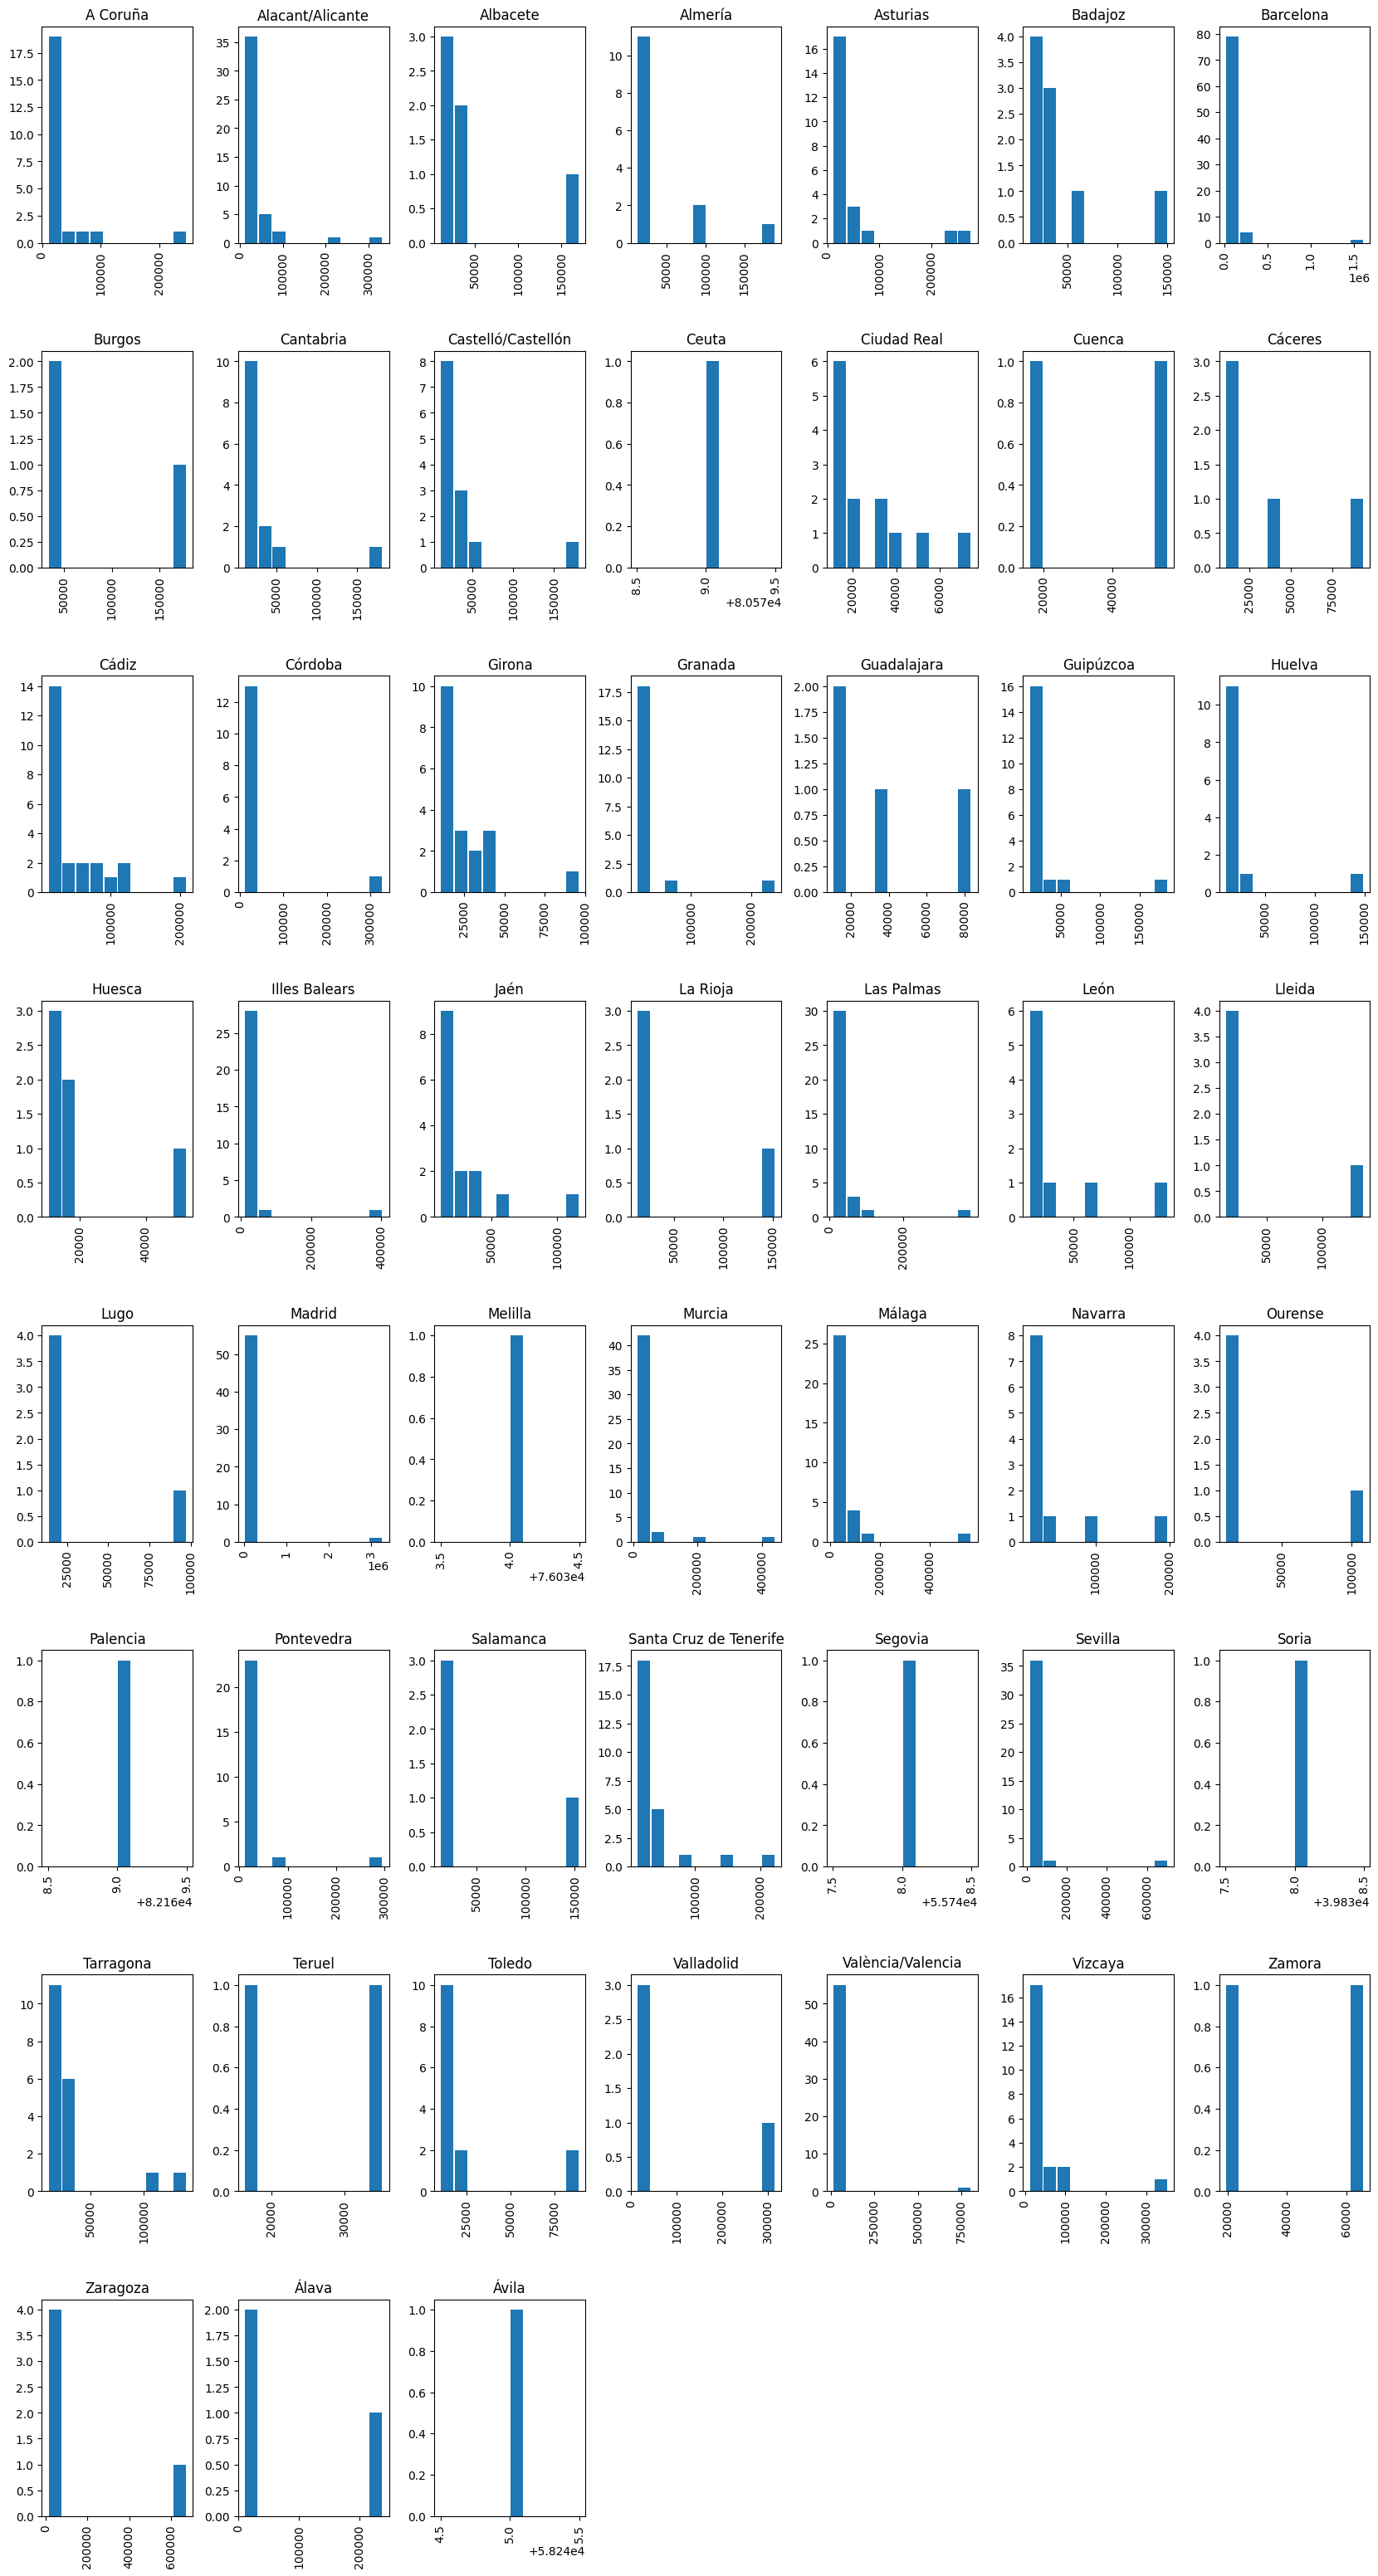

In [42]:
plt.rcParams["figure.figsize"] = (20,40)
df['Poblacion'].hist(by=df['Provincia'],rwidth=0.9)


### Problema 7
Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no
se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [43]:
#muestra 50 municipios con su poblacion si repeticion
muestra50=pd.DataFrame(df[['Municipio','Poblacion']].sample(50,replace=False))
#aseguramos no se repite
n=len(muestra50['Municipio'].unique())
#se calcula media y desviacion estandar
media=muestra50['Poblacion'].mean()
std=muestra50['Poblacion'].std()
#imprime resultados para los 50 municipios en general
print(f"Media: {media}\n\nDesviacion estandar: \n{std}")


Media: 43543.26

Desviacion estandar: 
58560.45929262913


### Problema 8
Dígame los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [44]:
#excluimos del dataset al municipio de madrid
dMadrid=df[df.Municipio !='Madrid']
#filtramos a columnasde interes
dMadrid=dMadrid[['Municipio','X','Y']]
#Municipio se repite por la columna de texto asi que para obtener valores X, Y se obtinene la media de ambos datos de cada coordinada
dMadrid=dMadrid.groupby(['Municipio']).agg(
    media_X=('X',np.mean),
    media_Y=('Y',np.mean)
)
#se obtuvieron los valores de x, y madrid al correr df[df['Municipio']=='Madrid']['X']   df[df['Municipio']='Madrid']['Y']
dMadrid['xm']=-3.703797
dMadrid['ym']=40.41663
dMadrid['dx']=(dMadrid['media_X']-dMadrid['xm'])**2
dMadrid['dy']=(dMadrid['media_Y']-dMadrid['ym'])**2
dMadrid['distancia']=np.sqrt((dMadrid['dx']+dMadrid['dy']))
#se ordenan los valores y se imprimen
dMadrid=dMadrid.sort_values(by='distancia')
print(f"\n\nTOP 5 mas cercanos\n\n {dMadrid[0:5].to_markdown()}\n")
print(f"\n\nTOP 5 mas lejanos\n\n {dMadrid.sort_values(by='distancia', ascending=False)[0:5].to_markdown()}")

ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.